In [1]:
# Required library imports

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import keras 
%matplotlib inline

Using TensorFlow backend.


In [2]:
#  url for the input dataset
# https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

# Attribute information

# No: row number 
# year: year of data in this row 
# month: month of data in this row 
# day: day of data in this row 
# hour: hour of data in this row 
# pm2.5: PM2.5 concentration (ug/m^3) 
# DEWP: Dew Point (â„ƒ) 
# TEMP: Temperature (â„ƒ) 
# PRES: Pressure (hPa) 
# cbwd: Combined wind direction 
# Iws: Cumulated wind speed (m/s) 
# Is: Cumulated hours of snow 
# Ir: Cumulated hours of rain 

# Read the input file
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
print("Dataset shape: ", df.shape)
df.head()

Dataset shape:  (43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
# Drop "No" column since its an index, fill NaN values with zeros
df.drop(['No'], axis=1, inplace=True)
df.fillna(0, inplace=True)
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
# Describe the statistics of the data
df.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,93.962030,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,92.253236,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [5]:
# Correlation between individual attributes
df.corr()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
year,1.000000e+00,-3.575502e-16,-1.663879e-16,0.000000e+00,0.016832,0.001122,0.045529,-0.012570,-0.064244,-0.017002,-0.024383
month,-3.575502e-16,1.000000e+00,1.079604e-02,-1.528210e-17,-0.025812,0.233975,0.170093,-0.062185,0.003043,-0.061672,0.036737
day,-1.663879e-16,1.079604e-02,1.000000e+00,-4.046030e-19,0.073689,0.028559,0.014791,-0.007070,-0.008954,-0.036826,0.002681
hour,0.000000e+00,-1.528210e-17,-4.046030e-19,1.000000e+00,-0.021646,-0.020988,0.150066,-0.041928,0.056618,-0.002374,-0.006286
pm2.5,1.683182e-02,-2.581211e-02,7.368891e-02,-2.164584e-02,1.000000,0.158248,-0.089830,-0.045565,-0.234182,0.022259,-0.048954
DEWP,1.121574e-03,2.339746e-01,2.855899e-02,-2.098769e-02,0.158248,1.000000,0.824633,-0.778346,-0.296399,-0.034410,0.125090
TEMP,4.552854e-02,1.700926e-01,1.479104e-02,1.500656e-01,-0.089830,0.824633,1.000000,-0.826690,-0.154623,-0.092601,0.049121
PRES,-1.257001e-02,-6.218507e-02,-7.070048e-03,-4.192788e-02,-0.045565,-0.778346,-0.826690,1.000000,0.185355,0.069028,-0.079843
Iws,-6.424368e-02,3.043299e-03,-8.953566e-03,5.661776e-02,-0.234182,-0.296399,-0.154623,0.185355,1.000000,0.021883,-0.010122
Is,-1.700207e-02,-6.167206e-02,-3.682638e-02,-2.373592e-03,0.022259,-0.034410,-0.092601,0.069028,0.021883,1.000000,-0.009548


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017ABE977E80>,
      dtype=object)

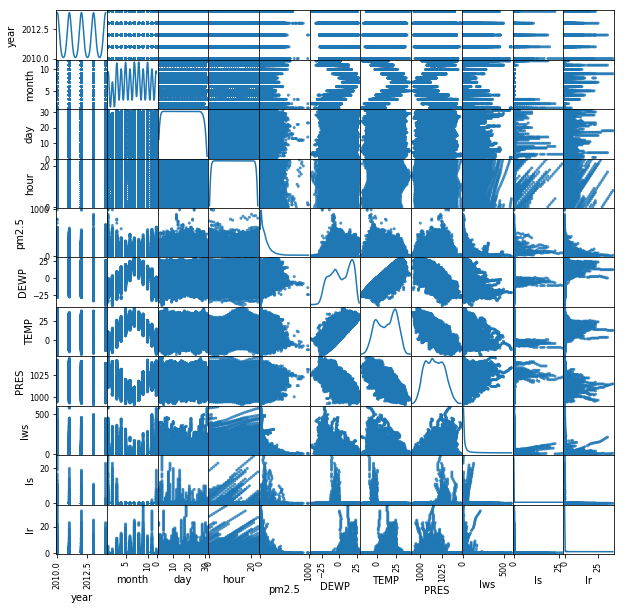

In [6]:
# Scatter matrix for data visualization with every pair of attributes
scatter_matrix(df, alpha=0.8, figsize=(10, 10), diagonal='kde')

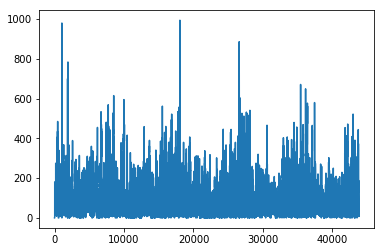

In [7]:
# Plot periodic trend of pm2.5
plt.plot(range(len(df)), df['pm2.5'])

In [12]:
# One hot encode cbwd column
one_hot_encoded_df = pd.get_dummies(df, columns=['cbwd'])
one_hot_encoded_df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,2010,1,1,0,0.0,-21,-11.0,1021.0,1.79,0,0,0,1,0,0
1,2010,1,1,1,0.0,-21,-12.0,1020.0,4.92,0,0,0,1,0,0
2,2010,1,1,2,0.0,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
3,2010,1,1,3,0.0,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
4,2010,1,1,4,0.0,-20,-12.0,1018.0,12.97,0,0,0,1,0,0


In [13]:
# Convert data into numpy array for further processing
numpy_data = np.array(one_hot_encoded_df)
numpy_data.shape

(43824, 15)

In [14]:
# Train on only first 20000 data points
mean = numpy_data[:20000].mean(axis=0)
numpy_data -= mean
std = numpy_data[:20000].std(axis=0)
numpy_data /= std

In [34]:
# Define a data generator
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=32, step=1):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
            
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][4]
        yield samples, targets

In [35]:
lookback = 240
step = 1
delay = 24
batch_size = 32

train_gen = generator(numpy_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=20000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(numpy_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=20001,
                    max_index=30000,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(numpy_data, 
                     lookback=lookback,
                     delay=delay,
                     min_index=30001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (30000 - 20000 - lookback) // batch_size

test_steps = (len(numpy_data) - 30001 - lookback) // batch_size


In [36]:
val_steps, test_steps

(305, 424)

In [37]:
# Baseline approach
def evaluate_baseline_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_baseline_method()

1.1379351203754973


In [38]:
# Basic Dense layer approach
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, numpy_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 4s 8ms/step - loss: 0.9817 - val_loss: 2.2421
Epoch 2/20
500/500 [==============================] - 4s 7ms/step - loss: 0.6410 - val_loss: 1.4200
Epoch 3/20
500/500 [==============================] - 4s 7ms/step - loss: 0.5264 - val_loss: 1.0843
Epoch 4/20
500/500 [==============================] - 4s 7ms/step - loss: 0.4663 - val_loss: 1.6201
Epoch 5/20
500/500 [==============================] - 4s 7ms/step - loss: 0.4290 - val_loss: 1.1044
Epoch 6/20
500/500 [==============================] - 4s 7ms/step - loss: 0.4015 - val_loss: 1.0732
Epoch 7/20
500/500 [==============================] - 4s 8ms/step - loss: 0.3754 - val_loss: 1.0645
Epoch 8/20
500/500 [==============================] - 4s 7ms/step - loss: 0.3640 - val_loss: 1.1453
Epoch 9/20
500/500 [==============================] - 4s 7ms/step - loss: 0.3398 - val_loss: 1.1953
Epoch 10/20
500/500 [==============================] - 4s 7ms/step - loss: 0.3271 - val_loss: 1.3380

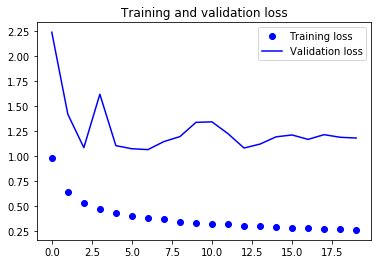

In [39]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
# Using GRU model

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, numpy_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 75s 150ms/step - loss: 0.6764 - val_loss: 0.6815
Epoch 2/20
500/500 [==============================] - 73s 147ms/step - loss: 0.6591 - val_loss: 0.6749
Epoch 3/20
500/500 [==============================] - 72s 143ms/step - loss: 0.6580 - val_loss: 0.6791
Epoch 4/20
500/500 [==============================] - 75s 150ms/step - loss: 0.6476 - val_loss: 0.6882
Epoch 5/20
500/500 [==============================] - 75s 149ms/step - loss: 0.6446 - val_loss: 0.6833
Epoch 6/20
500/500 [==============================] - 73s 145ms/step - loss: 0.6458 - val_loss: 0.6846
Epoch 7/20
500/500 [==============================] - 72s 144ms/step - loss: 0.6370 - val_loss: 0.6909
Epoch 8/20
500/500 [==============================] - 73s 145ms/step - loss: 0.6410 - val_loss: 0.6903
Epoch 9/20
500/500 [==============================] - 73s 146ms/step - loss: 0.6288 - val_loss: 0.6824
Epoch 10/20
500/500 [==============================] - 72s 145ms/step - l

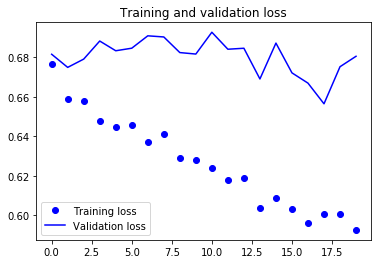

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [46]:
# Using stacked recurrent layers

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, numpy_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                            steps_per_epoch=500,
                            epochs=40,
                            validation_data=val_gen,
                            validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 185s 370ms/step - loss: 0.6657 - val_loss: 0.6733
Epoch 2/40
500/500 [==============================] - 174s 347ms/step - loss: 0.6408 - val_loss: 0.6847
Epoch 3/40
500/500 [==============================] - 170s 340ms/step - loss: 0.6463 - val_loss: 0.6622
Epoch 4/40
500/500 [==============================] - 172s 343ms/step - loss: 0.6372 - val_loss: 0.6801
Epoch 5/40
500/500 [==============================] - 174s 349ms/step - loss: 0.6350 - val_loss: 0.6658
Epoch 6/40
500/500 [==============================] - 188s 375ms/step - loss: 0.6217 - val_loss: 0.6602
Epoch 7/40
500/500 [==============================] - 185s 369ms/step - loss: 0.6224 - val_loss: 0.6687
Epoch 8/40
500/500 [==============================] - 121s 242ms/step - loss: 0.6212 - val_loss: 0.6621
Epoch 9/40
500/500 [==============================] - 118s 236ms/step - loss: 0.6145 - val_loss: 0.6786
Epoch 10/40
500/500 [==============================] - 108s 216m

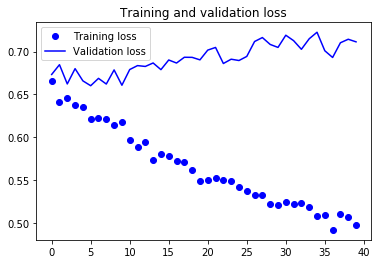

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()